## Câu 1: ....

## Câu 2:


Mean: 202.76666666666668, Median: 203.0, Mode: 203, Standard Deviation: 6.0610874939399615
Q1: 201.0, Q3: 204.75


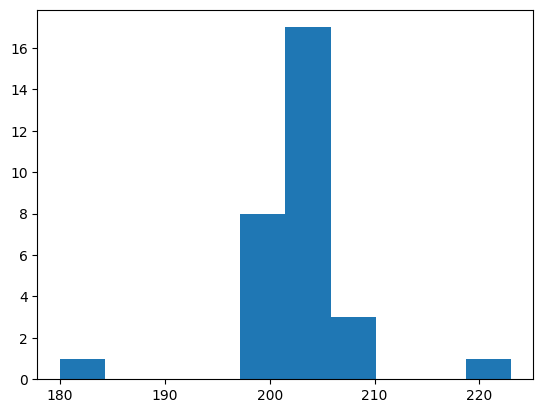

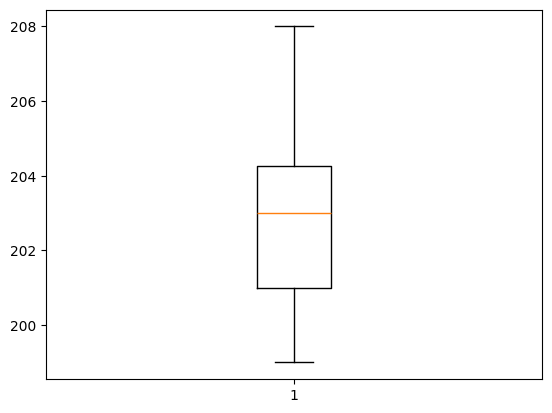

Out of 30 plants, 11 are suitable for harvesting, which is 36.666666666666664% of the total.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# a) Tính toán các giá trị thống kê về tính trung tâm và tính phân bố.
heights = [180, 206, 200, 206, 202, 205, 205, 203, 200, 202, 203, 201, 205, 201, 199, 199, 203, 204, 208, 203, 204, 203, 201, 200, 223, 202, 204, 205, 204, 202]
series = pd.Series(heights)

mean = series.mean()
median = series.median()
mode = series.mode()
std_dev = series.std()

print(f"Mean: {mean}, Median: {median}, Mode: {mode[0]}, Standard Deviation: {std_dev}")

# b) Xác định tử phân vị thứ nhất (Q1) và tử phân vị thứ 3 (Q3) của dữ liệu.
Q1 = series.quantile(0.25)
Q3 = series.quantile(0.75)

print(f"Q1: {Q1}, Q3: {Q3}")

# c) Vẽ lược đồ histogram và dựa trên đó để xác định các điểm ngoại lai (outlier) đi kèm với lý giải tóm tắt.
plt.hist(heights, bins=10)
plt.show()

# d) Trực quan hóa dữ liệu bằng box-plot sau khi đã loại bỏ các điểm ngoại lai.
IQR = Q3 - Q1
outlier_threshold_upper = Q3 + 1.5 * IQR
outlier_threshold_lower = Q1 - 1.5 * IQR

# Filter out the outliers
filtered_heights = [x for x in heights if outlier_threshold_lower < x < outlier_threshold_upper]

plt.boxplot(filtered_heights)
plt.show()

# e) Một cây cần đạt chiều cao từ 204 mm trở lên mới có thể làm thuốc được, nếu bạn là Harry Potter và GS Sprout hỏi bạn liệu có thu hoạch được chưa vì thời gian khá gấp rút rồi. Bạn cần lý giải cho nhận định của mình.
suitable_plants = len([x for x in filtered_heights if x >= 204])
total_plants = len(heights)
percentage_suitable = (suitable_plants / total_plants) * 100

print(f"Out of {total_plants} plants, {suitable_plants} are suitable for harvesting, which is {percentage_suitable}% of the total.")


## Câu 3:

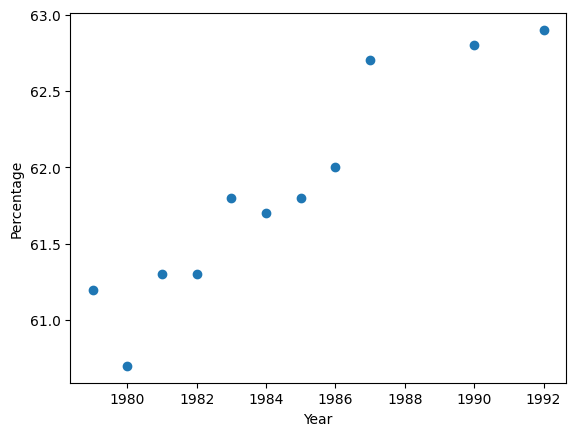

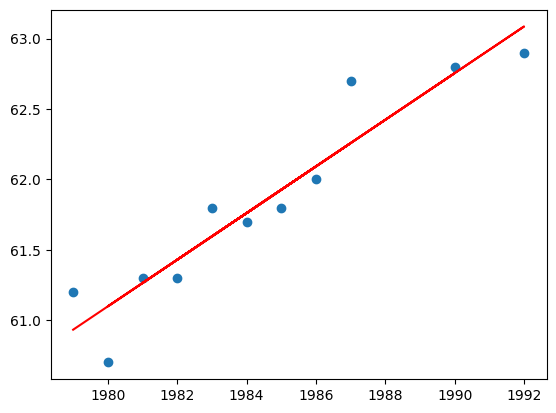

Predicted percentage for 2050: 72.69389312977097
Pearson correlation: 0.9447688551902926
Outliers: Empty DataFrame
Columns: [Year, Percentage]
Index: []


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# a) Create DataFrame and plot scatter plot
data = {
    'Year': [1979, 1985, 1980, 1986, 1981, 1987, 1982, 1990, 1983, 1992, 1984],
    'Percentage': [61.2, 61.8, 60.7, 62.0, 61.3, 62.7, 61.3, 62.8, 61.8, 62.9, 61.7]
}
df = pd.DataFrame(data)
plt.scatter(df['Year'], df['Percentage'])
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()

# b) There seems to be a positive correlation between the two variables

# c) Find linear regression line
X = df['Year'].values.reshape(-1,1)
y = df['Percentage'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

# d) Predict for year 2050
y_2050 = model.predict(np.array([[2050]]))
print(f"Predicted percentage for 2050: {y_2050[0]}")

# e) Calculate correlation coefficient
corr, _ = pearsonr(df['Year'], df['Percentage'])
print(f"Pearson correlation: {corr}")

# f) Check for outliers
Q1 = df['Percentage'].quantile(0.25)
Q3 = df['Percentage'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_upper = Q3 + 1.5 * IQR
outlier_threshold_lower = Q1 - 1.5 * IQR
outliers = df[(df['Percentage'] < outlier_threshold_lower) | (df['Percentage'] > outlier_threshold_upper)]
print(f"Outliers: {outliers}")

## Câu 4:

In [8]:
import numpy as np

W = np.array([0, 1, 0.5])
x = np.array([1, 2, 3])

output = np.dot(W, x)
print(f"The output for the new data sample x = [2, 3]^T is {output}")

The output for the new data sample x = [2, 3]^T is 3.5


In [9]:

W = np.array([0, 1, 0.5])
X = np.array([[1, 1, 2], [1, -2, 5], [1, 0, 1]])
y = np.array([1, 6, 1])

# Compute predictions
f_x = np.dot(X, W)

# Compute error
E = np.mean((y - f_x)**2)

print(f"The error of the network on the dataset X is {E}")

The error of the network on the dataset X is 10.5


In [10]:
n = 0.1

# Compute predictions
f_x = np.dot(X, W)

# Compute gradient
grad_E = 2/len(X) * np.dot(X.T, (f_x - y))

# Update weights
W_new = W - n * grad_E

print(f"The updated weights after one step of gradient descent are {W_new}")

The updated weights after one step of gradient descent are [0.33333333 0.2        2.23333333]
